In [1]:
import sklearn
import numpy
import pandas as ps
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading


In [2]:
ids = ps.read_csv("D:\Bharat Intern Internship\Iris Classification\Iris.csv")
ids.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
ids = ids.drop(columns =['Id'])
ids.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ids.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
ids['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocessing Dataset

In [7]:
ids.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Analysing Data

<Axes: >

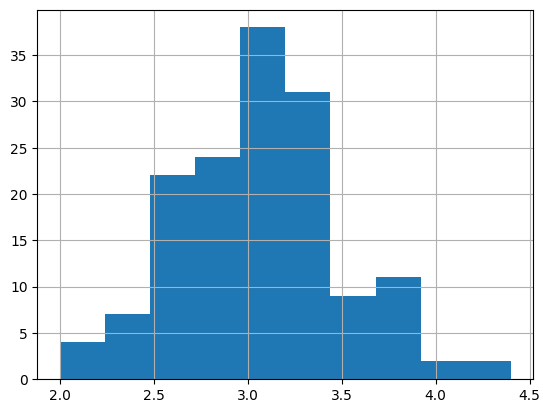

In [8]:
ids['SepalWidthCm'].hist()

<Axes: >

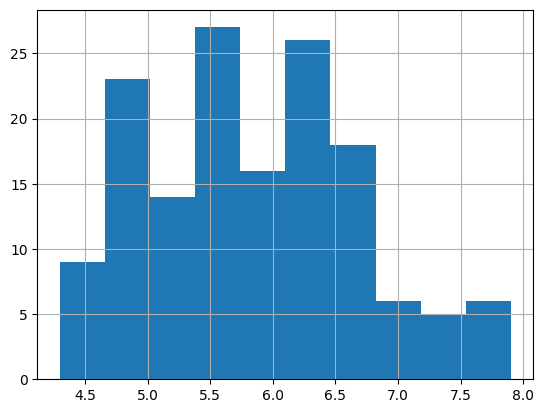

In [9]:
ids['SepalLengthCm'].hist()

<Axes: >

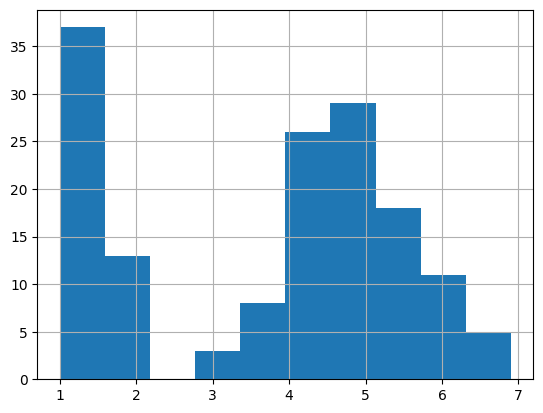

In [10]:
ids['PetalLengthCm'].hist()

<Axes: >

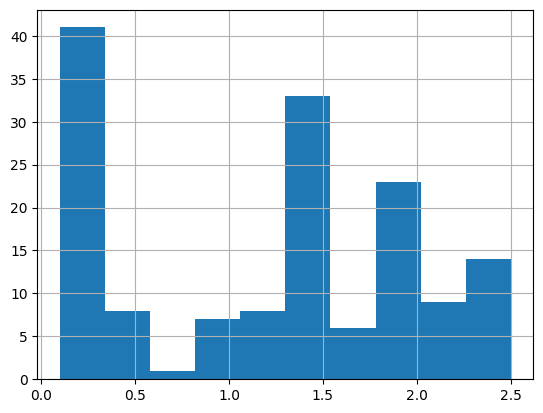

In [11]:
ids['PetalWidthCm'].hist()

## Correlation

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ids['Species'] = le.fit_transform(ids['Species'])
ids.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

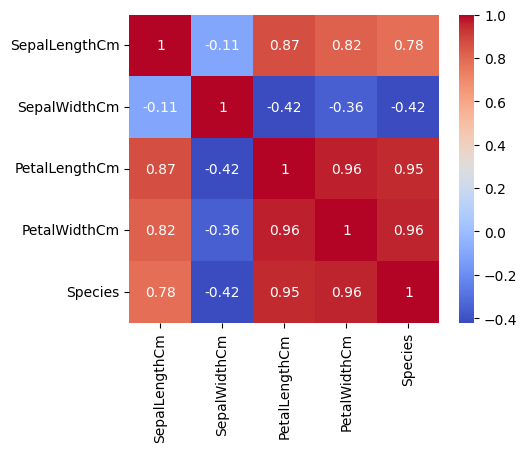

In [18]:
corr = ids.corr()
fig, ax = mat.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## Model Training And Testing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
X = ids.drop(columns=['Species'])
Y = ids['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.30)

In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",model.score(x_test,y_test)*100)


Logistic Regression Accuracy:  100.0


In [21]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [22]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [23]:
model = KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test,y_test)*100)

K-nearest neighbors Accuracy:  97.77777777777777


In [24]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [25]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [26]:
model = DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test,y_test)*100)

Decision Tree Accuracy:  95.55555555555556


In [27]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [28]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [29]:
import pickle
filename = 'savediris.sav'
pickle.dump(model,open(filename,'wb'))

In [30]:
import pickle
filename = 'savediris.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model, file)
    print("Model Saved Successfully!")
except Exception as e:
          print(f"Error Saving the model : {e}")

Model Saved Successfully!


In [31]:
loadmodel = pickle.load(open(filename, 'rb'))

In [32]:
loadmodel.predict([[6.0,2.2,4.0,1.0]])

array([1])